<a href="https://colab.research.google.com/github/RodolpheKouyoumdjian/LanguageLearningApp/blob/main/KNN_Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will analyze recorded earthquakes since 1965. First, we will plot these recorded earthquakes on the world map and see what type of information can be inferred. Secondly, we will using a KNN regression model to try to predict the intensity of an earthquake given its geographical location. Location information is in the format of latitude and longitude while the intensity information is given using the Richter scale. 

KNN stands for K-Nearest Neighbors

It is an algorithm attempting to predict some variable given some inputs. In this case, the variable is the magnitude and the inputs are the longitude and latitude. The KNN algorithm can be applied in both classification and regression cases. As we're predicting numerical data and not classifying, we're using the regression method. The prediction is simply the average of the *k* nearest neighbors. The algorithm will look at a *k* amount of points which have the shortest euclidian distance from the input coordinates and the result will be the average of the earthquake intensity of all these points.

In [ ]:
!pip install geopandas

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import numpy as np

In [ ]:
df = pd.read_csv('earthquake.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
# Storing relevant data
latitude = df['Latitude']
longitude = df['Longitude']
magnitude = df['Magnitude']

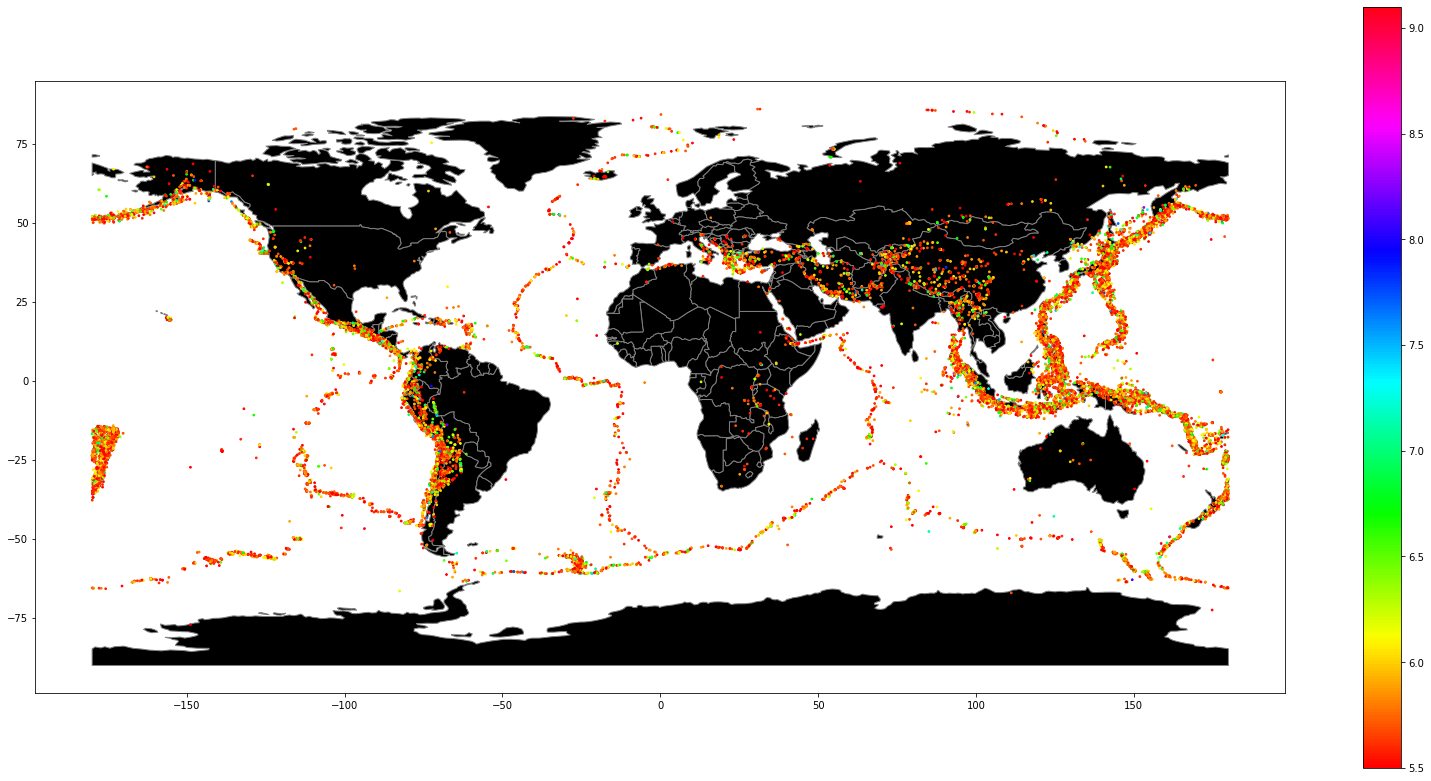

In [ ]:
fig, ax = plt.subplots(figsize=(28,14))
world.plot(ax=ax, color='black', edgecolor='grey')
plt.scatter(longitude, latitude, s=3, c=magnitude, cmap='hsv')
plt.colorbar()

K Nearest Neighbours

In [ ]:
coordinates = np.array([longitude, latitude]).T
X_train, X_test, y_train, y_test = train_test_split(coordinates, magnitude, test_size=0.30)

In [ ]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
error = (mean_squared_error(y_test, prediction_test)) ** 0.5
print(f'The error obtained with a k value of 3 is {error}')

The error obtained with a k value of 3 is 0.49549356232127006


In [ ]:
# Predicting new data
# Coordinate 1, using a rarer magnitude
user_long = 125.952
user_lat = -2.608
# Expected answer: 8.2
user_coordinate = np.array([[user_long, user_lat]])
model.predict(user_coordinate)                          

array([6.9])

In [ ]:
# Coordinate 2, using a common magnitude
user_long = 173.058
user_lat = 51.775
# Expected answer: 5.7
user_coordinate = np.array([[user_long, user_lat]])
model.predict(user_coordinate)                          

array([5.95])

In [ ]:
# Coordinate 3, using another rare magnitude
user_long = 178.715
user_lat = 51.251
# Expected answer: 8.7
user_coordinate = np.array([[user_long, user_lat]])
model.predict(user_coordinate)

array([7.5])

It seems that although the error is low, the model fails to predict correctly the higher and magnitudes which are much rarer. Let's visualize the model's predictions and reality 

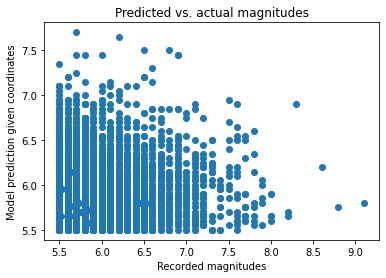

In [ ]:
# Analysis of accuracy of predictions
magnitude_prediction = model.predict(X_test)
plt.scatter(y_test, magnitude_prediction)
plt.xlabel('Recorded magnitudes')
plt.ylabel('Model prediction given coordinates')
plt.title('Predicted vs. actual magnitudes')
plt.show()

In [ ]:
# Amount of test magnitude greater than 7
(y_test > 7).sum()

177

In [ ]:
# Amount of predicted magnitude greater than 7
(magnitude_prediction > 7).sum()

30

In [ ]:
# Ratio of the two previous values.
round((y_test > 7).sum() / (magnitude_prediction > 7).sum(), 1)

5.9

From the scatterplot, we can see that the amount of predictions in the extremes is much less than the realized amount. In fact, there is 6.7 times as much data above a magnitude of 7 than what was predicted. A magnitude of 7 is consider as a major earthquake on the Richter scale. If the model was accurate, this ratio should be around 1, not 6.7. This shows that the model is able to predict with a relatively good accuracy the more common cases, but fails miserably at predicting the extremes. It seems that the k-nearest neighbors rarely have a high intensity too. If there was any correlation between location and intensity, this should not be the case, we would see that having one high intensity earthquake should mean that most earthquakes in this region are also of high intensity. This is not the case.  

https://www.usgs.gov/faqs/can-you-predict-earthquakes

According to the US Government, it is impossible to predict an earthquake. This analysis confirms that, at least for the intensity given a location, this is true. There seems to be no correlation between a specific coordinate and the intensity of an earthquake. 

To conclude this project:

Location has no influence whatsoever on the intensity of an earthquake. 

Using the location data and a world map, We've plotted the locations of earthquakes on the map. This gives an interesting visual output. By comparing this plot with an image of the techtonic plates, we can see that these earthquakes create an outline of the underground tectonic plates. 

https://www.usgs.gov/faqs/what-earthquake-and-what-causes-them-happen

This is logical as an earthquake is caused by stress released from the contact between two tectonic plates. 

A specific geographic location will not guarantee the presence of a certain magnitude of earthquakes: if we record an intense earthquake, the next earthquakes recorded in this area will not necessarily be of similar intensity. Using the map plot, we can see that some regions have a much higher concentration of earthquakes. The locations of these earthquakes that we can see on the map is called the Pacific Ring of Fire. In fact, 90% of the world's earthquakes are located in this region.
https://earthquake.usgs.gov/learn/glossary/?termID=150